# Fit the Larson data for the low frequency falling slope.  He must have taken this from a theoretical noise source.

Following Maggiore chapter 7, Eqn. 7.x $<n(t)>=0$ and $< |\tilde n(f)|^2 > = \frac{1}{2} S_n(f) T $ and $S_n(f)$ is what we get from the Larson curve or other.  $T$ comes from the observation time, $[-T/2, T/2]$ so that the resolution is $\Delta f = \frac{1}{T}$, when thinking about discrete systems.  Units of $S_n(f)$ are per root Hz.

## Larson curve with arm length of 1e9 m, at url http://www.srl.caltech.edu/~shane/sensitivity/MakeCurve.html  , and this is the "Root Spectral Density, per root Hz" also called the Amplitude Spectral Density and is the square root of $S_n(f)$ .

In [1]:
# For this data file:
# SNR = 1.000000 
# Armlength = 1.000000e+09 	meters
# Optics diameter = 0.300000 	meters
# Wavelength = 1064.000000 	nanometers
# Laser power = 1.000000 Watts
# Optical train efficiency = 0.300000 
# Accleration noise = 3.000000e-15 m/(s^2 root Hz)
# Position noise = 2.000000e-11 m/(root Hz)
# Sensitivity Floor Set by Position Noise Budget
# Output Curve type is Root Spectral Density, per root Hz
# Astrophysical Noise is No White Dwarf Noise


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd

In [2]:
larsonData = np.loadtxt("scg_4728.dat", usecols=(0,1))

In [3]:
print(larsonData[0:3] )
print(larsonData[-5:-1])

[[  4.88251800e-07   1.64610800e-12]
 [  4.99628100e-07   1.57199900e-12]
 [  5.11269200e-07   1.50122800e-12]]
[[  5.12818500e+00   4.24026100e-18]
 [  5.14447900e+00   3.84136400e-18]
 [  5.16082500e+00   3.62256300e-18]
 [  5.17722000e+00   3.60446100e-18]]


In [4]:
print(  list(  map(len, [larsonData[:], larsonData[:,0], larsonData[:][1] ]) )  )

[900, 900, 2]


<IPython.core.display.Javascript object>


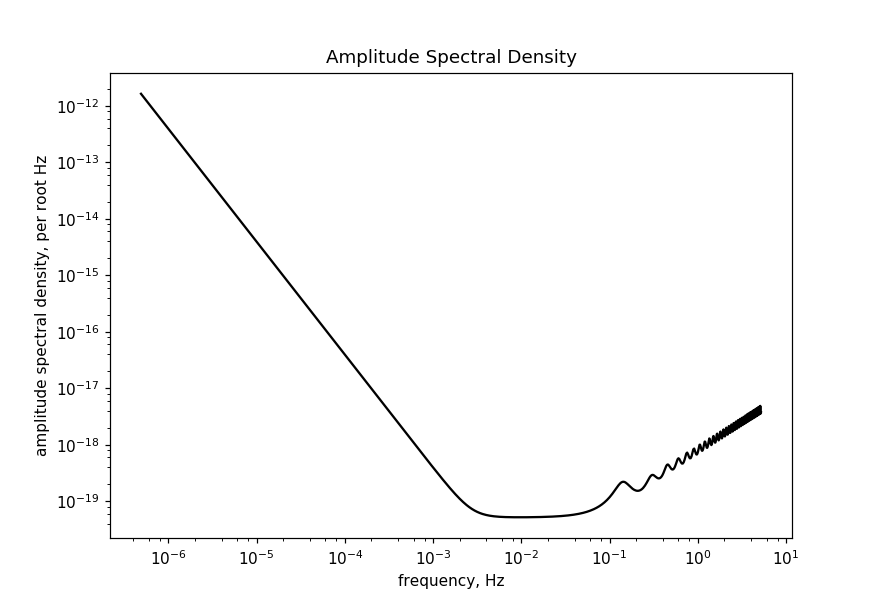

In [5]:
# Data from Larson curve generator as Amplitude Spectral Density.
fig = plt.figure(figsize=(8,5.5))
ax = plt.subplot((111))
ax.loglog(larsonData[:,0], larsonData[:,1], 'k-')
ax.set_title('Amplitude Spectral Density')
ax.set_xlabel('frequency, Hz')
ax.set_ylabel('amplitude spectral density, per root Hz')
plt.show()

<IPython.core.display.Javascript object>


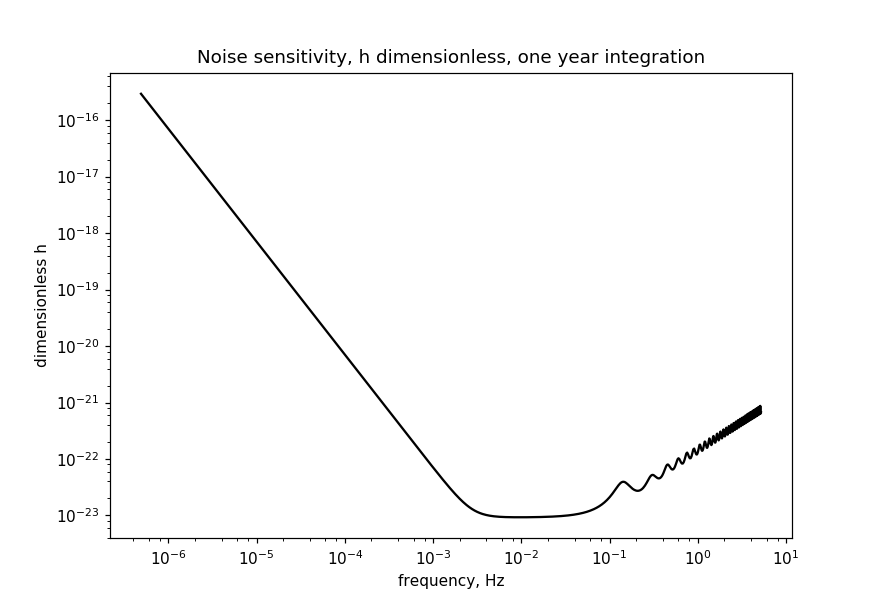

In [6]:
# Data as dimensionless h, ASD / root (time = 1 year) .
fig = plt.figure(figsize=(8,5.5))
ax = plt.subplot((111))
oneYear = 365.24*24.0*3600.;
ax.loglog(larsonData[:,0], larsonData[:,1]/np.sqrt(oneYear), 'k-')
ax.set_title('Noise sensitivity, h dimensionless, one year integration')
ax.set_xlabel('frequency, Hz')
ax.set_ylabel('dimensionless h')
plt.show()

## We want the $S_n(f)$ function, the noise power spectral density, units per Hz.

<IPython.core.display.Javascript object>


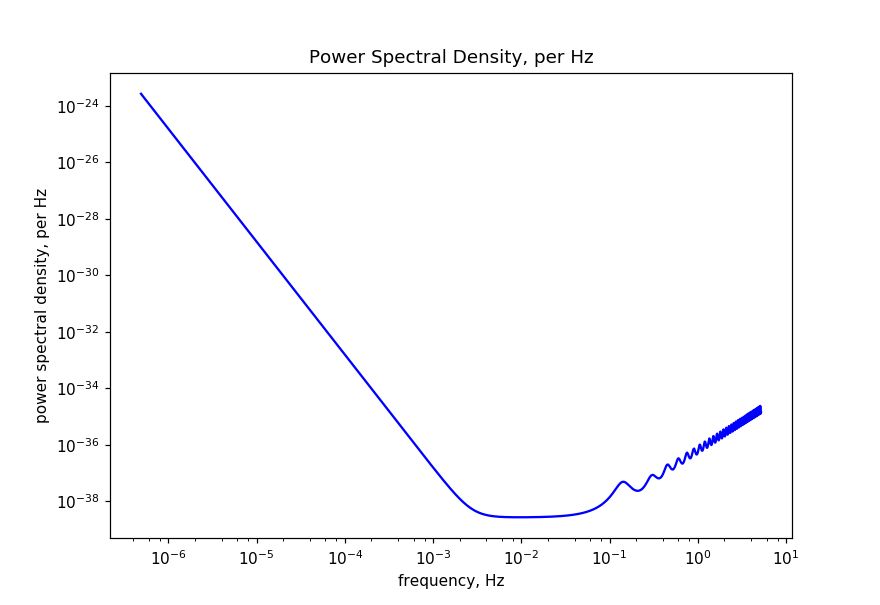

In [33]:
# Power spectral density as per Hz, square of ASD.
fig = plt.figure(figsize=(8,5.5))
ax = plt.subplot((111))
ax.loglog(larsonData[:,0], larsonData[:,1]**2, 'b-')
ax.set_title('Power Spectral Density, per Hz')
ax.set_xlabel('frequency, Hz')
ax.set_ylabel('power spectral density, per Hz')
plt.show()

<IPython.core.display.Javascript object>


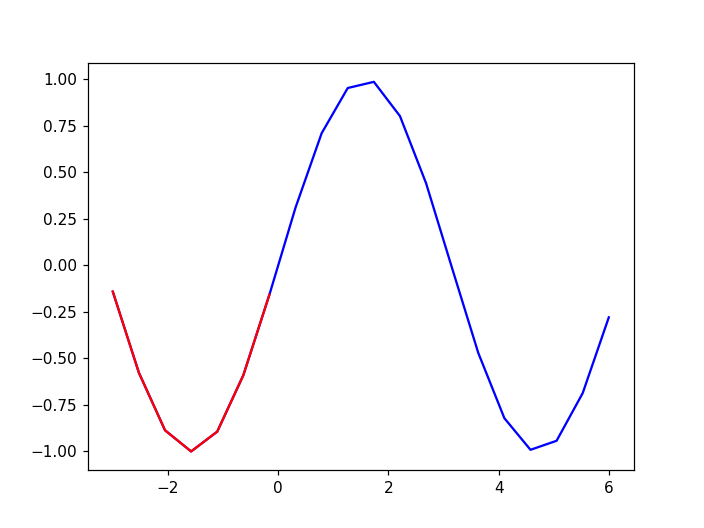

In [32]:
# test the numpy where...
xx = np.linspace(-3,6,20)
yy = np.sin(xx)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xx,yy,'b-')
#
xx2index = np.where(xx<0.0)[0]  # The .where is a tuple! Shape (n,1) so take [0] for the array of indices.
xx2 = xx[xx2index]
yy2 = yy[xx2index]

ax.plot(xx2, yy2, 'r-')

plt.show()

In [31]:
print( np.where(xx<0.0), type(np.where(xx<0.0)) )  # This is a tuple (7,1) shape, the 7 is the array of xx indices 
# where condn is true.
print( np.where(xx<0.0)[0], type(np.where(xx<0.0)[0] ) )

(array([0, 1, 2, 3, 4, 5, 6]),) <class 'tuple'>
[0 1 2 3 4 5 6] <class 'numpy.ndarray'>


<IPython.core.display.Javascript object>


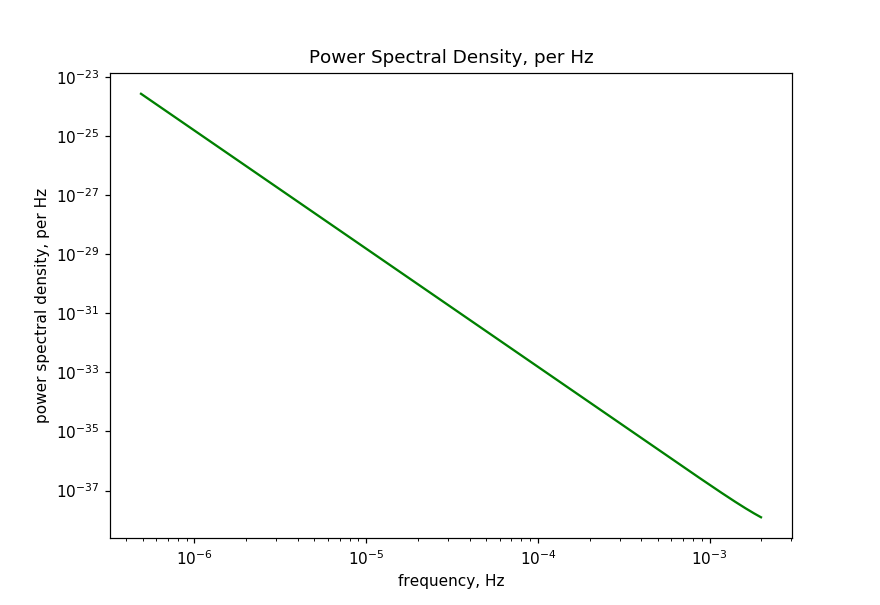

In [34]:
# Data for fit, below 2e-3 Hz.
# Power spectral density as per Hz, square of ASD.
fig = plt.figure(figsize=(8,5.5))
ax = plt.subplot((111))
xxIndex = np.where( larsonData[:,0]<=2e-3 )[0]
freqLarsonFit = larsonData[xxIndex,0]
SnLarsonFit = larsonData[xxIndex,1]**2
ax.loglog( freqLarsonFit, SnLarsonFit, 'g-')
ax.set_title('Power Spectral Density, per Hz')
ax.set_xlabel('frequency, Hz')
ax.set_ylabel('power spectral density, per Hz')
plt.show()

In [35]:
# Use https://stackoverflow.com/questions/18760903/fit-a-curve-using-matplotlib-on-loglog-scale

xx = np.log10(freqLarsonFit)
yy = np.log10(SnLarsonFit)
coeffs = np.polyfit(xx, yy, 1)
fitPoly = np.poly1d(coeffs)

In [36]:
yyFit = lambda x: 10**fitPoly(np.log10(x))

<IPython.core.display.Javascript object>


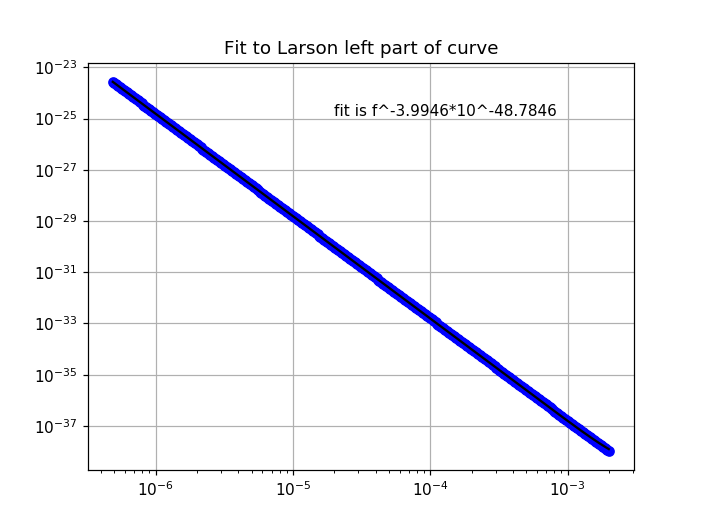

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(freqLarsonFit, yyFit(freqLarsonFit), 'bo')
ax.loglog(freqLarsonFit, SnLarsonFit, 'k-')
ax.set_title('Fit to Larson left part of curve')
ax.text(2e-5, 1.3e-25, 'fit is f^%7.4f*10^%8.4f'%(coeffs[0],coeffs[1]) )
ax.grid(True)
plt.show()

Coeffs of -3.99 and -48 means a formula in $f$ of $S_n(f) = \frac{1}{f^4} 10^{-48.7845}$ or ${1.642e-49}/{f^4}$ in units of per Hz.  Or just messing around and letting -3.9946 be -4,  $0.1642 ( 10^{-12}/f )^4$ .

In [48]:
print( 10**(coeffs[1]), 10**(coeffs[1]+48.0))

1.64214459092e-49 0.164214459092
